# STAT207 Mini-Project #1 - Exploring the Relationship Between Used Car Prices and Mileage for Different Transmission Types


Sahil Sangani

In [17]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Introduction

The goal for this project is to help the buyers and sellers understand depreciation trends of car prices. The project will help the buyers decide what to look at when choosing a used car to buy, and will help the sellers decide how to maintain their car to get the best price. Milage is often considered a key factor that shows vehicle wear and tear. <br> <br>
Research Question: How does the nature of the relationship between mileage and price change for different types of transmission? <br> <br>
For a person looking to buy a used car, the results from this will help them determine whether they should choose manual or automatic transmission. If the buyer already has made the choice this can help them see if their budget fits the type of transmission they want. <br> <br>
While other factors might be more influencial when a buyer makes a purchase of a used car, this project just looks at mileage and transmission type. 

## 2. Dataset Discussion

Used Cars Dataset: Originally comes from a popular automotive marketplace website, https://www.cars.com. This dataset comprises of 4,009 data points, each representing a unique vehicle listing. This data was manually collected a year ago from the cars that were on sale at cars.com  <br>

I downloaded this csv file on 02/19/2025 from [kaggle.com](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset "Hyperlink") <br>

The three variables that I intend to explore are price, milage, and transmission.
price shows the listed prices for each vehicle when they were at sale on cars.com. Milage shows the mileage of each vehicle, and transmission shows the type of transmission the listed cars have. Price and Mileage are numerical variables, and transmission is a categorical variable.

In [18]:
df = pd.read_csv('used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [19]:
print(f'Number of rows before any data cleaning: {df.shape[0]}')

Number of rows before any data cleaning: 4009


## 3. Dataset Cleaning

To analyze data from price and mileage columns, $ and mi. units must be removed, along with comma that represents thousand. Finally convert both to float data type. I will also rename the column names to show respective units of measurement. There are zero implicit or explicit missing values in price and milage columns. <br> <br>

Data entry for transmission is done manually so it contains messy data. My goal is to have transmission type to be categorized as manual or automatic, as this is easier to understand for a buyer. In order to maximize the original data, I will make a new column named 'transmission type' and keep the original transmission data in the same column. Example: '6-Speed A/T' is a 'automatic' transmission type, '7-Spd M/T' is manual. CVT and DCT are both part of automatic type. The data contains the following implicit missing values ['F', '2', '6-Speed', '7-Speed', 'SCHEDULED FOR OR IN PRODUCTION', 'Variable'] as these could not be categorized into manual or automatic types. 18 rows will be dropped for containing implicit missing values in 'transmission' column. <br> <br>

In [20]:
df['price'] = df['price'].str.replace("$", '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

In [21]:
df['milage'] = df['milage'].str.replace("mi.", '')
df['milage'] = df['milage'].str.replace(',', '')
df['milage'] = df['milage'].astype(float)
df = df.rename(columns={'milage': 'milage (mi.)', 'price': 'price ($)'})

Known missing values in 'transmission': 'F', '2', '7-Speed', 'SCHEDULED FOR OR IN PRODUCTION', 'Variable', '6-Speed']

In [22]:
def identify_transmission_type(input):
    input = input.lower()
    if any(keyword in input for keyword in ['a/t', 'automatic', 'at', 'cvt', 'dct', 'dual', 'overdrive']):
        return 'automatic'
    elif any(keyword in input for keyword in ['m/t', 'mt', 'manual']):
        return 'manual'
    else:
        return np.nan

In [23]:
df['transmission_type'] = df['transmission'].apply(identify_transmission_type)

In [24]:
df = df.dropna(subset=['transmission_type'])

For outliers, I want to only consider cars which are under $100,000 in price as a limit of $100k fits used car buyers who this research is for. This will drop 230 rows, which lowers the amount of data but we will still have 3762 car listings. <br>
Milage has a few high outliers but it is not necessary to drop them as the outliers show good data and decide to drop them if they are still outliers when in relation with price.

In [25]:
df = df[ df['price ($)'] <= 100000]

Text(0.5, 1.0, 'One variable: Price')

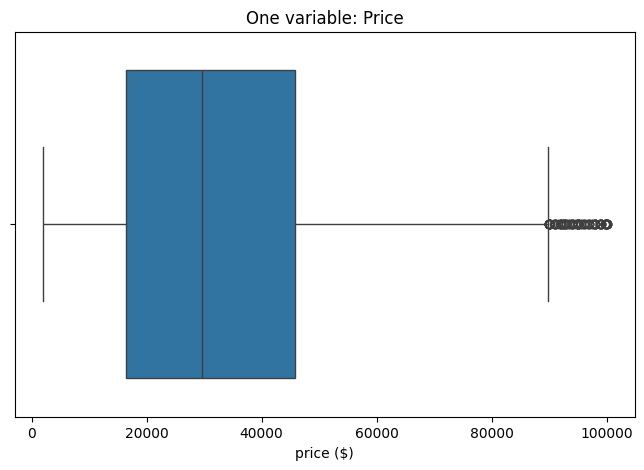

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x='price ($)', data=df)
plt.title('One variable: Price')

Text(0.5, 1.0, 'One Variable: Milage')

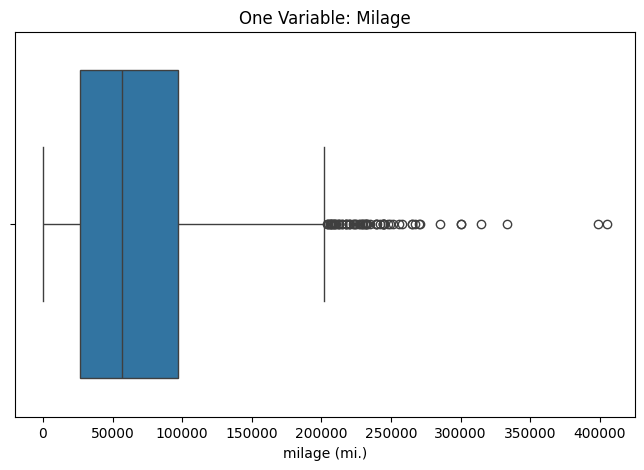

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='milage (mi.)', data=df)
plt.title('One Variable: Milage')

Text(0.5, 1.0, 'Two Variables: Price and Milage')

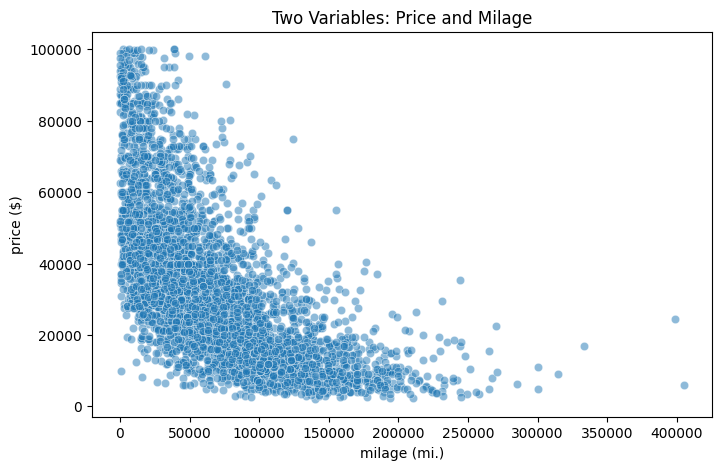

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='milage (mi.)', y='price ($)', alpha=0.5)
plt.title('Two Variables: Price and Milage')


In [29]:
df['log_price'] = np.log(df['price ($)'])
df['log_milage'] = np.log(df['milage (mi.)'])

In [ ]:
plt.figure(figsize=(8,5))
sns.lmplot(data=df, x='log_milage', y='price ($)')
plt.ylim([0,100000])
plt.title('Two variables: Price and Log(Milage)')

TypeError: lmplot() got an unexpected keyword argument 'alpha'

<Figure size 800x500 with 0 Axes>

I dropped 248 rows while cleaning data, which still leaves us with 3762 rows. I had a idea of narrowing my research to just a few car brands that are commonly found in used cars market. For example, only looking at the cars produced by Toyota, this would give us a better idea of depreciation of the car. Doing so would reduce the variability in the data and could give us a better correlation.

Another idea I had was to compare cars that have the same model_year, I think there can be some variability in the transmissions from different years. For example a 5-6 speed automatic transmission from 2010 would be much less efficient at retaining price as compared to a 8-9 speed automatic transmission. CVT and DCT are known to be more milage friendly than most older automatic transmission. But for the purpose of this project I had them all grouped up in automatic type.

## 4. <u>Research Question</u>: Research Question: How does the nature of the relationship between mileage and price change for different types of transmission?

The relationship between price and mileage is logarithmic as shown in a graph above. This is expected as cars show rapid decline in price when they are new and then the decline slows down as more milage grows to be large. The log(milage) and price scatterplot below controls for transmission type in 2 categories automatic and manual. 

Text(0.5, 1.0, 'Relationship between price and log(milage) while controlling for transmission type')

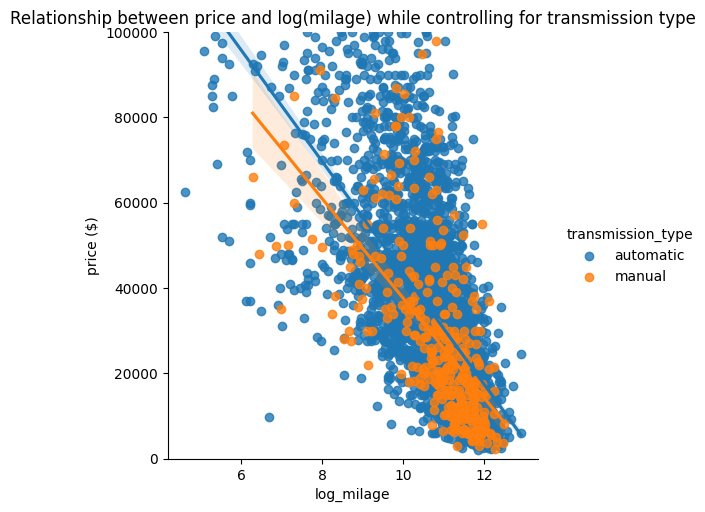

In [31]:
sns.lmplot(data=df, x='log_milage', y='price ($)', hue='transmission_type')
plt.ylim([0,100000])
plt.title('Relationship between price and log(milage) while controlling for transmission type')

The relationship between price and milage are negative for both transmission types, and the shape of the relationship is logarithmic decay. The shape of the relationship between price and log(milage) is linear for both transmission types. Strength of price and log(milage) is moderately strong for both automatic and manual types, but automatic has a slightly stronger correlation. <br> 
Just one significant outlier of automatic type but because of having so many data points it does not affect the line of best fit.
The slope of the relationship between price and log(milage) is the almost the same for both automatic and manual type.

In [32]:
df[['transmission_type', 'price ($)', 'log_milage']].groupby('transmission_type').corr()

price ($)  log_milage
transmission_type                                  
automatic         price ($)    1.000000   -0.661188
                  log_milage  -0.661188    1.000000
manual            price ($)    1.000000   -0.635677
                  log_milage  -0.635677    1.000000

Answer: The relationship between price nad milage does not change for different types of transmission.

## 5. Conclusion

In conclusion, the type of transmission does not significantly affect the relationship between price and milage of a used car. There are a lot of factors that could affect the price and milage relationship like the fuel type, brand, model year, engine type, number of accidents, etc. To fully answer the research question knowing the price that the vehicle listed was bought for originally would be useful as it could actually show the depreciation of a car based on milage, and would show what elements influence the relationship the most. The outliers in price - milage graph could show that the car being sold might have a different issue if the price is too low or that the car is overprised. For future work based around the research goal, someone can make a linear regression model to predict the price of a used car. This can also be used to find what factor is most influencial in used car prices.
